# Linear Neural Network
## 从零开始实现线性回归

## 生成数据集

features: tensor([ 0.7423, -1.3561]) 
label: tensor([10.2908])


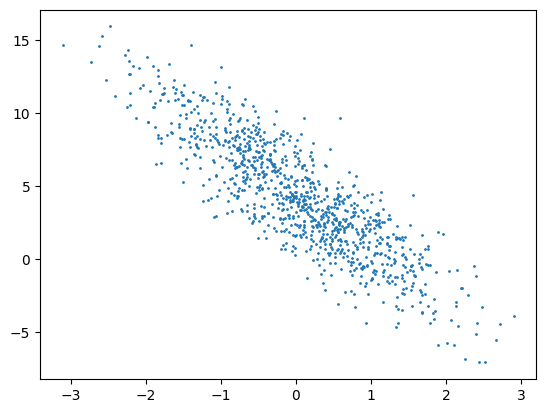

In [4]:
import random
import torch
import numpy as np
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

## 读取数据集

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.8365,  0.1933],
        [-0.8464,  0.3710],
        [-0.6796, -1.4135],
        [ 0.0383,  0.1019],
        [-0.4467,  1.0038],
        [-0.0420, -0.6891],
        [ 0.9265,  0.2201],
        [ 0.7688,  0.9915],
        [ 0.2981,  0.8026],
        [ 1.3784, -1.2197]]) 
 tensor([[ 5.2084],
        [ 1.2394],
        [ 7.6305],
        [ 3.9450],
        [-0.1152],
        [ 6.4554],
        [ 5.2995],
        [ 2.3591],
        [ 2.0516],
        [11.1098]])
